In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('penghasilan-per-keluarga.csv')
df

,JumlahAnggotaKeluarga,Penghasilan (juta rupiah)
0,4,5
1,4,8
2,4,3
3,4,1
4,1,3
5,1,4
6,1,7
7,1,5
8,2,6
9,2,2


Text(0, 0.5, 'Penghasilan (juta rupiah)')

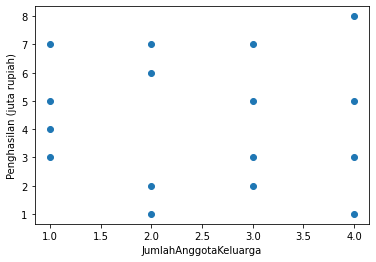

In [15]:
plt.scatter(df['JumlahAnggotaKeluarga'], df['Penghasilan (juta rupiah)'])
plt.xlabel('JumlahAnggotaKeluarga')
plt.ylabel('Penghasilan (juta rupiah)')

In [16]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[ 1.34164079,  0.31250504],
       [ 1.34164079,  1.67616342],
       [ 1.34164079, -0.59660054],
       [ 1.34164079, -1.50570612],
       [-1.34164079, -0.59660054],
       [-1.34164079, -0.14204775],
       [-1.34164079,  1.22161063],
       [-1.34164079,  0.31250504],
       [-0.4472136 ,  0.76705784],
       [-0.4472136 , -1.05115333],
       [-0.4472136 , -1.50570612],
       [-0.4472136 ,  1.22161063],
       [ 0.4472136 , -0.59660054],
       [ 0.4472136 ,  0.31250504],
       [ 0.4472136 ,  1.22161063],
       [ 0.4472136 , -1.05115333]])

In [17]:
df_scaled = pd.DataFrame(df_scaled, columns=['JumlahAnggotaKeluarga','Penghasilan (juta rupiah)'])
df_scaled

,JumlahAnggotaKeluarga,Penghasilan (juta rupiah)
0,1.341641,0.312505
1,1.341641,1.676163
2,1.341641,-0.596601
3,1.341641,-1.505706
4,-1.341641,-0.596601
5,-1.341641,-0.142048
6,-1.341641,1.221611
7,-1.341641,0.312505
8,-0.447214,0.767058
9,-0.447214,-1.051153


In [18]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [19]:
y_predicted = km.fit_predict(df_scaled[['JumlahAnggotaKeluarga','Penghasilan (juta rupiah)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0])

In [20]:
df['tipePenghasilan'] = y_predicted
df

,JumlahAnggotaKeluarga,Penghasilan (juta rupiah),tipePenghasilan
0,4,5,2
1,4,8,2
2,4,3,0
3,4,1,0
4,1,3,1
5,1,4,1
6,1,7,1
7,1,5,1
8,2,6,1
9,2,2,0


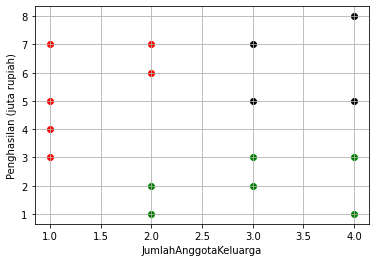

In [21]:
df1 = df[df.tipePenghasilan==0]
df2 = df[df.tipePenghasilan==1]
df3 = df[df.tipePenghasilan==2]

plt.scatter(df1.JumlahAnggotaKeluarga,df1['Penghasilan (juta rupiah)'],color='green')
plt.scatter(df2.JumlahAnggotaKeluarga,df2['Penghasilan (juta rupiah)'],color='red')
plt.scatter(df3.JumlahAnggotaKeluarga,df3['Penghasilan (juta rupiah)'],color='black')

plt.xlabel('JumlahAnggotaKeluarga')
plt.ylabel('Penghasilan (juta rupiah)')
plt.grid()

In [22]:
conditions = [
    (df['tipePenghasilan']==0),
    (df['tipePenghasilan']==1),
    (df['tipePenghasilan']==2)]
choices = ['Rendah','Rata-Rata','Tinggi']
df['tipePenghasilan'] = np.select(conditions, choices)
df

,JumlahAnggotaKeluarga,Penghasilan (juta rupiah),tipePenghasilan
0,4,5,Tinggi
1,4,8,Tinggi
2,4,3,Rendah
3,4,1,Rendah
4,1,3,Rata-Rata
5,1,4,Rata-Rata
6,1,7,Rata-Rata
7,1,5,Rata-Rata
8,2,6,Rata-Rata
9,2,2,Rendah
